In [88]:
using StatsPlots, Plots
using Distributions
using Statistics, StatsBase
using CSV, DataFrames
using Dates
using LsqFit
using HypothesisTests
using LaTeXStrings
using Plots.PlotMeasures
# using SingularSpectrumAnalysis

In [89]:
df_acf_pacf = CSV.read("data/acf_pacf_data.csv", DataFrame)

,lag,up_acf,down_acf,up_pacf,down_pacf
,Int64,Float64,Float64,Float64,Float64
1,0,1.0,1.0,1.0,1.0
2,1,0.756043,0.716569,0.756043,0.716569
3,2,0.00374954,-0.0482843,0.00374954,-0.0482843
4,3,0.0569179,0.00628937,0.0569179,0.00628937
5,4,0.049759,-0.00197125,0.049759,-0.00197125
6,5,0.0496712,0.000387071,0.0496712,0.000387071
7,6,0.0468475,-0.00462328,0.0468475,-0.00462328
8,7,0.0482275,-0.00433203,0.0482275,-0.00433203
9,8,0.0449422,-0.00754419,0.0449422,-0.00754419


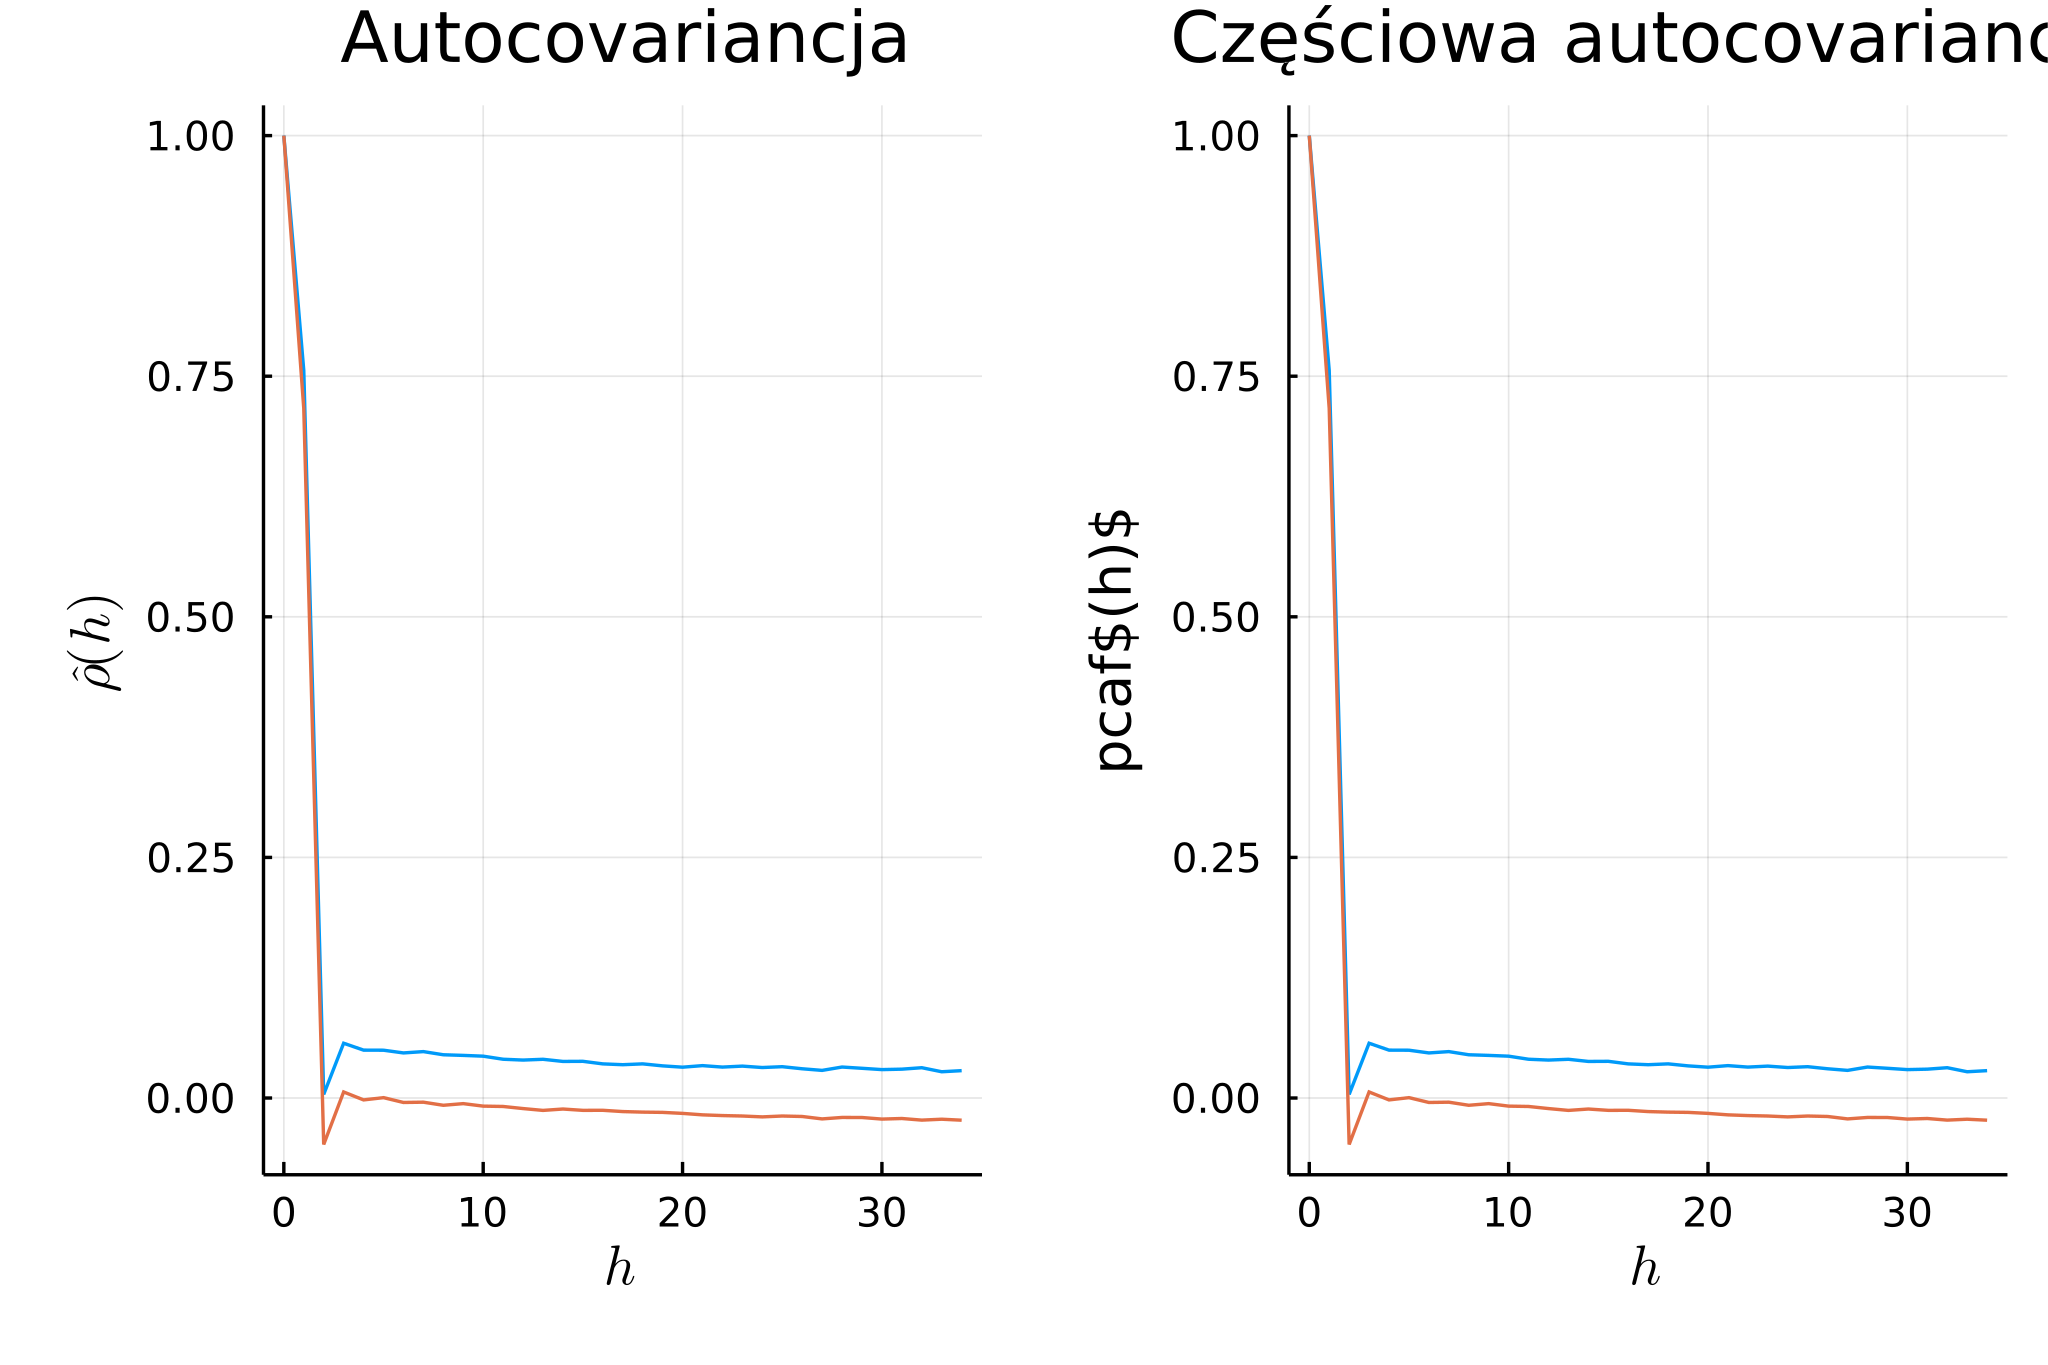

In [90]:
a = plot(df_acf_pacf.lag , df_acf_pacf.up_acf,dpi=500)
plot!(df_acf_pacf.lag , df_acf_pacf.down_acf)
plot!(leg=false,title="Autocovariancja",ylabel=L"$\hat{\rho}(h)$", xlabel=L"$h$")
b = plot(df_acf_pacf.lag , df_acf_pacf.up_pacf,leg=false,dpi=500,title="Częściowa autocovariancja",ylabel=L"pcaf$(h)$", xlabel=L"$h$")
plot!(df_acf_pacf.lag , df_acf_pacf.down_pacf,leg=false)
plot(a,b,bottom_margin=5mm, left_margin=5mm)


In [91]:
savefig(plot!(),"tex_Maciej/img/acf_pacf.png")

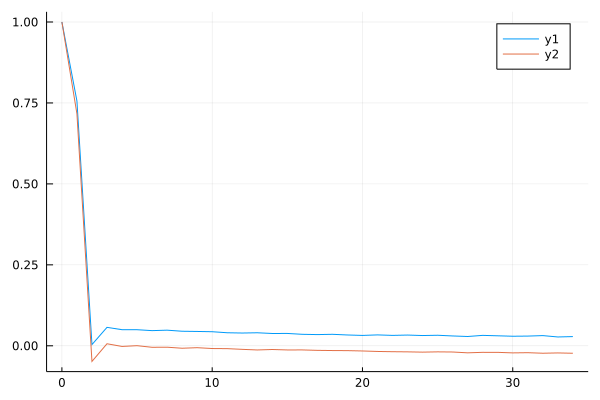

In [92]:
plot(df_acf_pacf.lag , df_acf_pacf.up_pacf)
plot!(df_acf_pacf.lag , df_acf_pacf.down_pacf)

In [93]:
df_samples_quantails = CSV.read("data/samples_quantails.csv", DataFrame)

,orginal,sample_09,sample_01,sample_095,sample_005
,Float64,Float64,Float64,Float64,Float64
1,-1.25,2.49964,-2.79566,3.35166,-3.5867
2,-1.625,3.22446,-3.60901,4.10224,-4.5594
3,-0.0892857,3.57149,-3.89934,4.60597,-4.8223
4,0.291667,3.56928,-3.97917,4.62193,-5.18599
5,2.07143,3.56401,-4.11238,4.75788,-5.09957
6,0.25,3.98188,-3.91141,5.06584,-5.00566
7,1.875,3.72737,-3.95151,4.67217,-5.07251
8,6.5,3.76557,-3.99487,4.94516,-4.97338
9,6.75,3.92368,-4.03696,4.96129,-4.92498


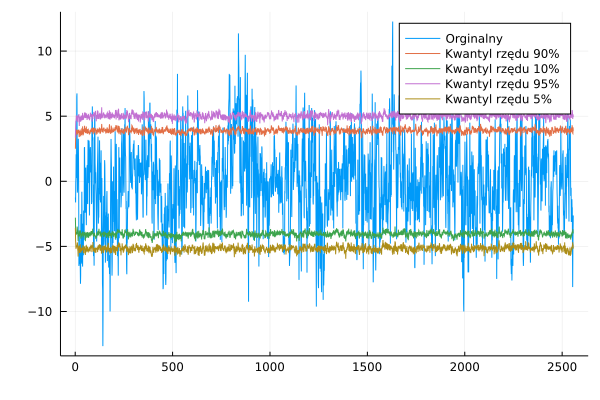

In [94]:
plot(df_samples_quantails.orginal, label = "Orginalny",bottom_margin=5mm, left_margin=5mm)
plot!(df_samples_quantails.sample_09, label = "Kwantyl rzędu 90%")
plot!(df_samples_quantails.sample_01, label = "Kwantyl rzędu 10%")
plot!(df_samples_quantails.sample_095, label = "Kwantyl rzędu 95%")
plot!(df_samples_quantails.sample_005, label = "Kwantyl rzędu 5%")

In [95]:
savefig(plot!(), "tex_Maciej/img/linie_kwantylowe.png")

In [96]:
File=CSV.read("data/residua.csv", DataFrame);
File

,Residua
,Float64
1,-1.15538
2,-0.67737
3,1.13468
4,0.350854
5,1.92554
6,-1.22747
7,1.8405
8,5.13403
9,1.98817


In [97]:
residua = File.Residua

2557-element Vector{Float64}:
 -1.1553844081691207
 -0.6773699164762972
  1.1346801980690369
  0.3508535806833218
  1.9255353955576027
 -1.2274705288975787
  1.8404956706086983
  5.134025534289041
  1.98817293111461
 -1.638621856336818
 -2.9795639799577263
  0.05357146497687193
  1.1797375051775867
  ⋮
 -0.23535180957619162
 -2.9059413341215135
 -0.4253862440299616
 -1.157906137418774
  0.5945165329804645
 -1.3904161145379532
 -0.3895574016972523
 -3.6097312375823956
 -4.4566694738163495
  0.632328695693329
 -0.23576234133240348
  0.1899477824103526

## Założenie o wartości średniej

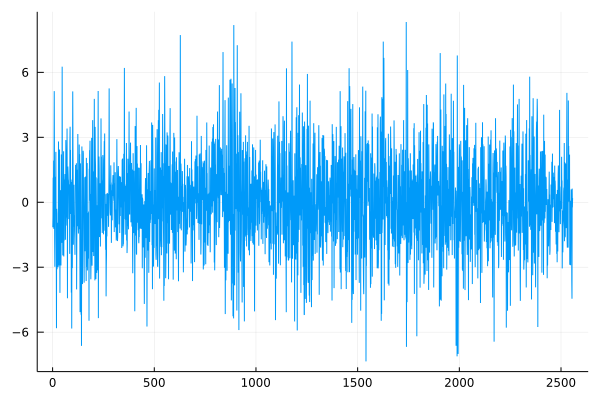

In [98]:
plot(residua,leg=false)

In [99]:
savefig(plot!(),"tex_Maciej/img/residua.png")

In [100]:
OneSampleTTest(residua)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.000791916
    95% confidence interval: (-0.08009, 0.08167)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.9847

Details:
    number of observations:   2557
    t-statistic:              0.019200134473658807
    degrees of freedom:       2556
    empirical standard error: 0.04124531616232871


## Założenie o równej wariancji 

wykres  jakm wyżej

In [101]:
LeveneTest(residua)

ArgumentError: ArgumentError: FDist: the condition ν1 > zero(ν1) && ν2 > zero(ν2) is not satisfied.

## Założenie o niezależności 

In [102]:
df_residua_acf_pacf = CSV.read("data/residua_acf_pacf.csv", DataFrame);

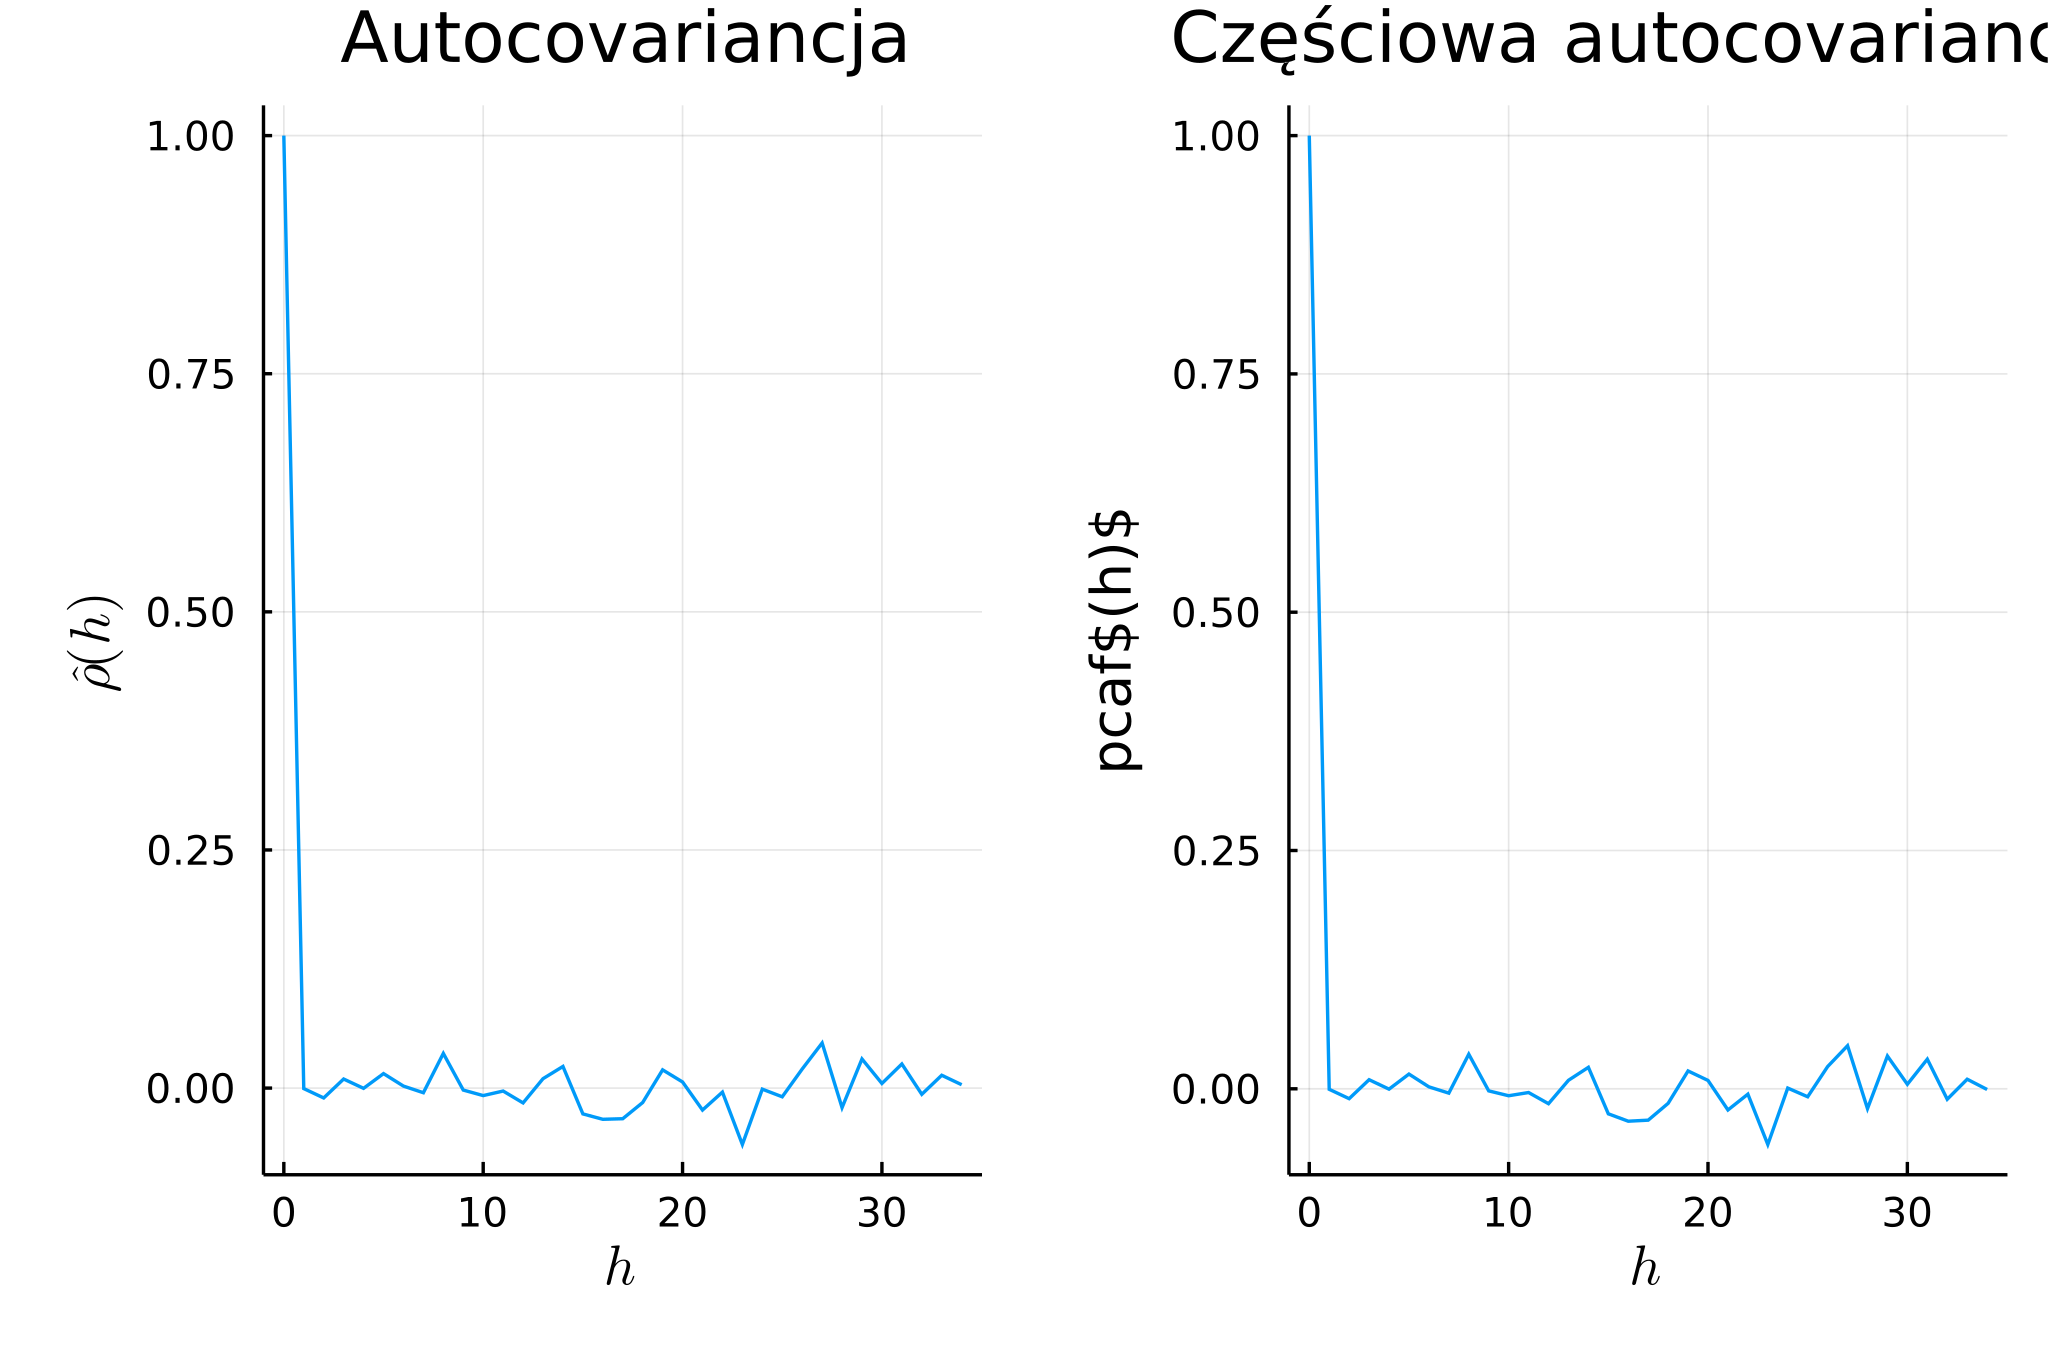

In [105]:
a = plot(df_residua_acf_pacf.lag, df_residua_acf_pacf.acf,leg=false,title="Autocovariancja",ylabel=L"$\hat{\rho}(h)$", xlabel=L"$h$")
b = plot(df_residua_acf_pacf.lag, df_residua_acf_pacf.pacf,leg=false,dpi=500,title="Częściowa autocovariancja",ylabel=L"pcaf$(h)$", xlabel=L"$h$")
plot(a,b,bottom_margin=5mm, left_margin=5mm)

In [106]:
savefig(plot!(),"tex_Maciej/img/acf_pacf_residua.png")

In [107]:
LjungBoxTest(residua,1)

Ljung-Box autocorrelation test
------------------------------
Population details:
    parameter of interest:   autocorrelations up to lag k
    value under h_0:         "all zero"
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.9788

Details:
    number of observations:         2557
    number of lags:                 1
    degrees of freedom correction:  0
    Q statistic:                    0.000705594


## Rozkład rezidów

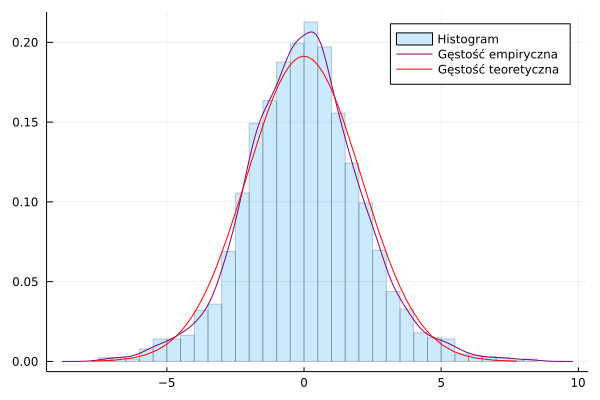

In [115]:
histogram(residua,normed=true,alpha=0.2,label="Histogram")
density!(residua,color="purple",label="Gęstość empiryczna")
plot!(Normal(0,sqrt(4.3478)),color="red",label="Gęstość teoretyczna")


In [116]:
savefig(plot!(),"tex_Maciej/img/density.png")

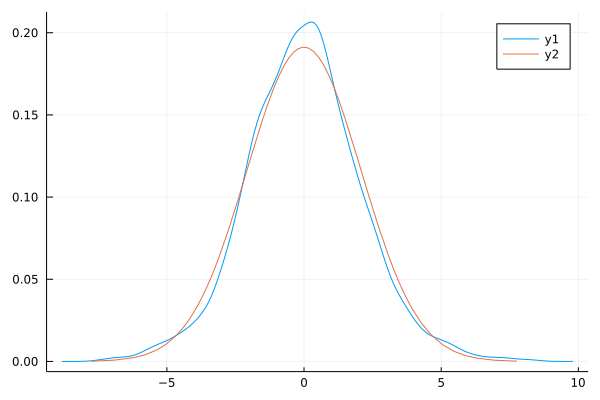

In [ ]:
density(residua)
# plot!(Normal(0,sqrt(4.3478)))
plot!(Normal(0,std(residua)))

In [ ]:
var(residua)

4.349907301329971

In [ ]:
# ecdf_plot(residua)

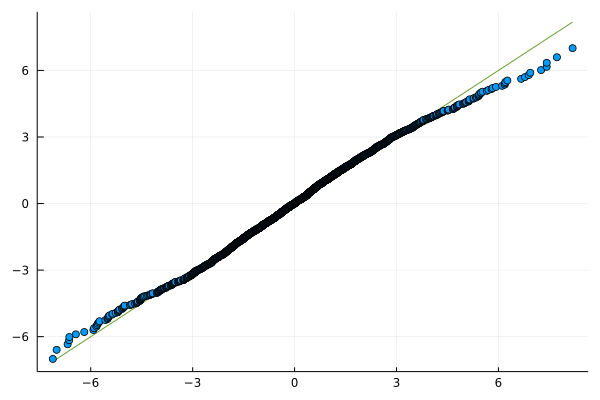

In [117]:
qqplot(residua,Normal(0,sqrt(4.3478)))

In [118]:
savefig(plot!(),"tex_Maciej/img/qqplot.png")

In [119]:
OneSampleADTest(residua,Normal(mean(residua),std(residua)))

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           0.0334

Details:
    number of observations:   2557
    sample mean:              0.0007919156167252843
    sample SD:                2.0856431385378396
    A² statistic:             2.830020981780576


In [ ]:
ExactOneSampleKSTest(residua, Normal(mean(residua),std(residua)))

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.0246638

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.0877

Details:
    number of observations:   2557
